# Parte Computacional

## **(e)** 
Vamos considerar agora dois filtros candidatos a equalizador, cujos coeficientes são mostrados a seguir:

$w_1 = [1, 0.5, (0.5)^2, (0.5)^3, (0.5)^4]$

$w_2 = [1, 1.5, 0.7, −0.2, 0.3]$

Apresente, então, a resposta combinada para cada um dos filtros usados, ou seja,  $g_1[n] = w_1[n] ∗ h[n]$  e  $g_2[n] = w_2[n] ∗ h[n]$. A partir das respostas combinadas obtidas, discuta a qualidade de cada um dos filtros
tendo em vista o objetivo desejado na tarefa de equalização.

**Observação:** para o cálculo da convolução, implemente uma rotina que realize a operação matricial tratada no item **(b)**.

In [1]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#função de convolução
def gera_H(D, K, x):
  '''
  Função que realiza a convolução
  Inputs: D --> comprimento da resposta ao impulso
          K --> número de amostras do sinal de entrada
          x --> vetor que multiplica H
  Output: retorna matriz H encontrada na teoria
  '''
  #variáveis
  P = D + K - 1               #comprimento do vetor resposta x --> encotrado na teoria
  H = np.zeros((P, K))        #matriz H inicializada com seu tamanho definido por D e K
  a = 0                       #auxiliar para a lógica de formação da matriz H a partir de x

  #formação de H
  for i in range(P):
    b = i                    #b recebe índices de P: 0..P-1
    if a < D:                #se auxiliar for menor que o tamanho D
      for j in range(K):
        H[b][j] = x[a]       #H[b][j] recebe o índice correspondente de x[a]
        j = j + 1            #incrementamos manualmente j
        b = b + 1            #incrementamos manualmente b
        if j == K:           #se chagamos no valor de K
          i = b              #i recebe b
      a = a + 1              #incrementamos manualmente a
  return H                   #retorna a matriz H pronta

In [3]:
#defindo as variáveis do exercício
h = [1, -0.5]
w1 = [1, 0.5, 0.25, 0.125, 0.0625]
w2 = [1, 1.5, 0.7, -0.2, 0.3]

In [4]:
#matriz de convolução de w1
H_w1 = gera_H(len(w1), len(h), w1)

g1 = H_w1.dot(h)
g1

array([ 1.     ,  0.     ,  0.     ,  0.     ,  0.     , -0.03125])

In [5]:
#matriz de convolução de w2
H_w2 = gera_H(len(w2), len(h), w2)

g2 = H_w2.dot(h)
g2

array([ 1.  ,  1.  , -0.05, -0.55,  0.4 , -0.15])

### Discussão letra **(e)**

Queremos encontrar uma resposta que chegue o mais próximo possível de uma recuperação completa do sinal, isto é: 

$y[n] = s[n]$

Para isto, vimos na parte teórica que a convolução entre $w[n]$ e $h[n]$ deve resultar no impulso unitário $\delta[n]$.

Analisando $g_1$ e $g_2$ encontramos:

$\left \{ \begin{matrix} g_1 = [ 1, 0, 0, 0, 0, -0.03125] \\ g_2 = [ 1, 1, -0.05, -0.55, 0.4, -0.15]\end{matrix} \right.$

Note que tanto em $g_1$ como em $g_2$ o primeiro elemento é $1$. No entanto, $g_2$ não apresenta elementos nulos, enquanto que $g_1$ possui quatro elementos nulos. Logo, $g_1$ possui uma melhor qualidade de filtragem se comparado a $g_2$.

## **(f)**
Crie um conjunto de 100 amostras, assumindo os valores $+3$, $+1$, $−1$ e $−3$ com (aproximadamente) igual probabilidade, para o sinal $s[n]$.

Simule, então, a transmissão deste sinal pelo canal $h[n]$. Ou seja, faça a convolução entre o vetor $s$ gerado e o vetor $h$, composto pelo coeficientes da resposta ao impulso do canal $h[n]$ obtida no item **(c)**. O resultado
desta convolução é o vetor $x$, que contém as amostras do sinal recebido ($x[n]$). Compare os valores assumidos pelos sinais $x[n]$ e $s[n]$.

In [6]:
#conjunto de 100 amostras com valores +/- 3 e +/- 1
s = np.random.uniform(0, 1, 100)
s[np.where(s < 0.25)] = 3
s[np.where(s < 0.5)] = 1
s[np.where(np.abs(s) < 0.75)] = -1
s[np.where(np.abs(s) < 1)] = -3
s

array([ 1.,  1.,  1., -1., -1., -3.,  1.,  1., -1.,  1.,  1.,  3., -3.,
       -3., -1.,  1.,  3.,  3.,  3.,  1., -3., -1.,  1.,  3., -1.,  1.,
       -3., -1., -1., -3., -1., -3., -3., -1., -1., -1.,  1.,  1.,  3.,
        3.,  1., -1., -3., -1., -1., -1., -1., -1.,  3., -1.,  1., -1.,
        3.,  1., -3., -3., -1., -3.,  1., -1.,  1., -1.,  3.,  3.,  3.,
       -3.,  1.,  3., -3.,  3.,  1.,  1., -3.,  3.,  1.,  1., -3., -3.,
       -3.,  1.,  3.,  1., -3.,  3., -3.,  1.,  1., -3.,  3.,  3., -1.,
        1.,  1.,  3., -3., -3., -1., -1.,  1., -3.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


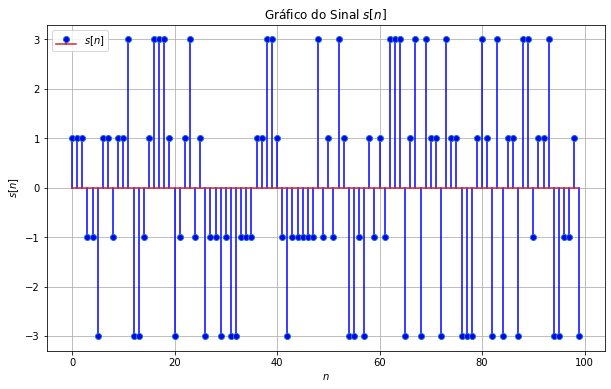

In [7]:
#plotando o gráfico de s[n]
plt.figure(figsize = (10,6))
markerline2, stemlines2, _ = plt.stem(s, label='$s[n]$')
plt.setp(markerline2, 'markerfacecolor', 'b')
plt.setp(stemlines2, 'color', 'b')
plt.legend()
plt.xlabel('$n$')
plt.ylabel('$s[n]$')
plt.title('Gráfico do Sinal $s[n]$')
plt.grid()
plt.show()

In [8]:
#realizando a convolução com h = [1, -0.5]
H_s = gera_H(len(h), len(s), h)      #encontrando a matriz de convolução
x = H_s.dot(s)
x

array([ 1. ,  0.5,  0.5, -1.5, -0.5, -2.5,  2.5,  0.5, -1.5,  1.5,  0.5,
        2.5, -4.5, -1.5,  0.5,  1.5,  2.5,  1.5,  1.5, -0.5, -3.5,  0.5,
        1.5,  2.5, -2.5,  1.5, -3.5,  0.5, -0.5, -2.5,  0.5, -2.5, -1.5,
        0.5, -0.5, -0.5,  1.5,  0.5,  2.5,  1.5, -0.5, -1.5, -2.5,  0.5,
       -0.5, -0.5, -0.5, -0.5,  3.5, -2.5,  1.5, -1.5,  3.5, -0.5, -3.5,
       -1.5,  0.5, -2.5,  2.5, -1.5,  1.5, -1.5,  3.5,  1.5,  1.5, -4.5,
        2.5,  2.5, -4.5,  4.5, -0.5,  0.5, -3.5,  4.5, -0.5,  0.5, -3.5,
       -1.5, -1.5,  2.5,  2.5, -0.5, -3.5,  4.5, -4.5,  2.5,  0.5, -3.5,
        4.5,  1.5, -2.5,  1.5,  0.5,  2.5, -4.5, -1.5,  0.5, -0.5,  1.5,
       -3.5,  1.5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


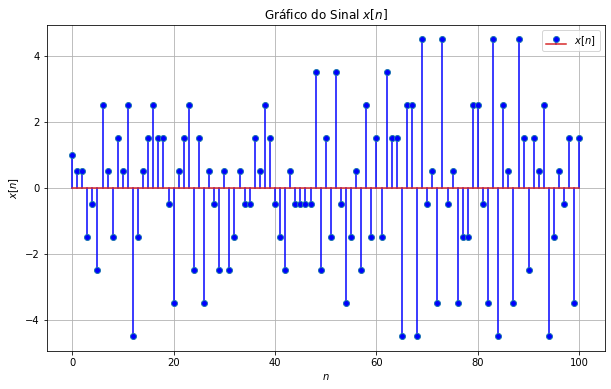

In [9]:
#plotando o gráfico de x[n]
plt.figure(figsize = (10,6))
markerline2, stemlines2, _ = plt.stem(x, label='$x[n]$')
plt.setp(markerline2, 'markerfacecolor', 'b')
plt.setp(stemlines2, 'color', 'b')
plt.legend()
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('Gráfico do Sinal $x[n]$')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


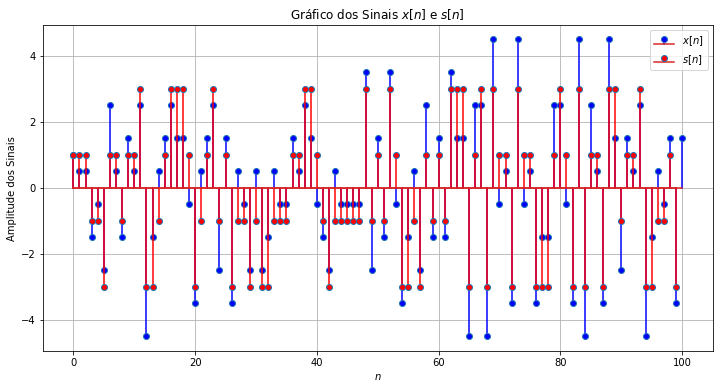

In [10]:
#comparação entre s[n] e x[n]
plt.figure(figsize = (12,6))

markerline1, stemlines1, _ = plt.stem(x, label='$x[n]$')
plt.setp(markerline1, 'markerfacecolor', 'b')
plt.setp(stemlines1, 'color', 'b')

markerline2, stemlines2, _ = plt.stem(s, label='$s[n]$')
plt.setp(markerline2, 'markerfacecolor', 'r')
plt.setp(stemlines2, 'color', 'r')

plt.legend()
plt.xlabel('$n$')
plt.ylabel('Amplitude dos Sinais')
plt.title('Gráfico dos Sinais $x[n]$ e $s[n]$')
plt.grid()
plt.show()

### Discussão letra **(f)**

O valores de $x[n]$, resultantes da convolução entre $s$ e $h$, quando comparados ponto a ponto com $s[n]$, possuem uma amplitude que varia de $-4.5$ a $4.5$ que ocorrem nas amplitudes máximas e mínimas de $s[n]$ (note que isso não ocorre para todas as máximas ou mínimas, mas $x[n]=4.5$ ocorre em alguns $s[n]=3$, assim como $x[n]=-4.5$ ocorre em alguns $s[n]=-3$)

## **(g)**
Filtre o sinal $x[n]$ pelos equalizadores $w_1[n]$ e $w_2[n]$ (cujos coeficientes foram apresentados no item **(e)**), gerando as saídas $y_1[n]$ e $y_2[n]$, respectivamente.

Faça, então, dois gráficos como detalhado a seguir:
*    Gráfico 1: em um mesmo gráfico, plote o sinal de entrada $s[n]$ em azul e a saída $y_1[n]$ em vermelho.
*    Gráfico 2: em um mesmo gráfico, plote o sinal de entrada $s[n]$ em azul e a saída $y_2[n]$ em vermelho.

In [11]:
#x[n] filtrado por w1[n] e obtendo y1[n]
H_x_w1 = gera_H(len(w1), len(x), w1)
y1 = H_x_w1.dot(x)
y1

array([ 1.     ,  1.     ,  1.     , -1.     , -1.     , -3.03125,
        0.96875,  0.96875, -0.96875,  1.03125,  1.09375,  2.96875,
       -3.03125, -2.96875, -1.03125,  0.96875,  2.90625,  3.09375,
        3.09375,  1.03125, -3.03125, -1.09375,  0.90625,  2.90625,
       -1.03125,  1.09375, -2.96875, -1.03125, -1.09375, -2.96875,
       -1.03125, -2.90625, -2.96875, -0.96875, -0.90625, -0.96875,
        1.09375,  1.09375,  3.03125,  3.03125,  1.03125, -1.03125,
       -3.03125, -1.09375, -1.09375, -1.03125, -0.96875, -0.90625,
        3.03125, -0.96875,  1.03125, -0.96875,  3.03125,  0.90625,
       -2.96875, -3.03125, -0.96875, -3.09375,  0.96875, -0.90625,
        1.09375, -0.96875,  3.09375,  2.96875,  3.03125, -3.03125,
        1.03125,  2.90625, -3.09375,  2.90625,  1.09375,  0.96875,
       -3.09375,  3.09375,  0.90625,  0.96875, -3.03125, -2.90625,
       -3.09375,  0.96875,  2.96875,  1.09375, -2.90625,  3.09375,
       -3.03125,  0.90625,  0.96875, -2.90625,  2.90625,  3.09

In [12]:
#x[n] filtrado por w2[n] e obtendo y2[n]
H_x_w2 = gera_H(len(w2), len(x), w2)
y2 = H_x_w2.dot(x)
y2

array([ 1.  ,  2.  ,  1.95, -0.6 , -2.2 , -4.25, -1.15,  2.15,  1.35,
       -1.65,  2.35,  4.75, -1.15, -6.15, -5.25,  2.85,  4.05,  5.75,
        5.35,  2.75, -2.75, -4.95,  0.35,  5.65,  1.15, -0.65, -3.05,
       -2.45, -3.25, -1.75, -4.75, -3.25, -4.55, -4.35, -0.15, -1.35,
       -0.15,  2.65,  4.25,  5.15,  3.85, -1.55, -4.65, -3.75, -1.35,
       -0.85, -2.45, -1.35,  2.35,  2.35,  0.15, -1.85,  3.85,  2.65,
       -1.05, -8.25, -3.05, -2.25, -1.65, -0.05,  1.65, -1.55,  3.35,
        4.95,  6.95, -2.35, -2.45,  3.25,  2.35, -2.35,  3.35,  4.55,
       -5.35,  1.05,  3.55,  3.75, -5.05, -4.95, -6.45,  0.05,  4.45,
        4.85, -3.45, -0.85,  0.65, -0.55, -0.85,  1.25, -2.25,  6.45,
        3.75, -3.15,  2.05,  5.25, -1.45, -6.15, -5.25,  0.85,  0.05,
       -2.15, -2.45, -0.65,  2.2 , -1.35,  0.45])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


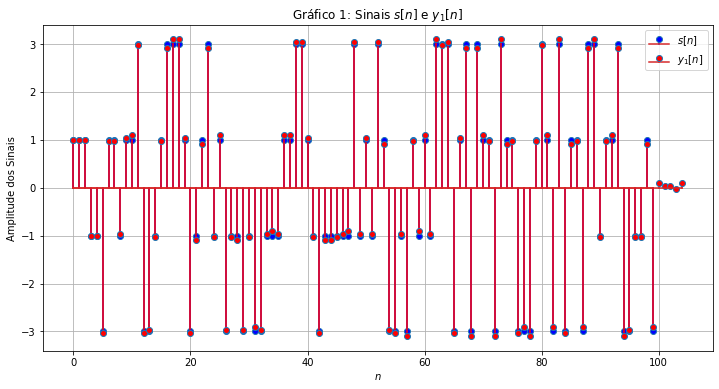

In [13]:
#Gráfico 1
plt.figure(figsize = (12,6))

markerline1, stemlines1, _ = plt.stem(s, label='$s[n]$')
plt.setp(markerline1, 'markerfacecolor', 'b')
plt.setp(stemlines1, 'color', 'b')

markerline2, stemlines2, _ = plt.stem(y1, label='$y_1[n]$')
plt.setp(markerline2, 'markerfacecolor', 'r')
plt.setp(stemlines2, 'color', 'r')

plt.legend()
plt.xlabel('$n$')
plt.ylabel('Amplitude dos Sinais')
plt.title('Gráfico 1: Sinais $s[n]$ e $y_1[n]$')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


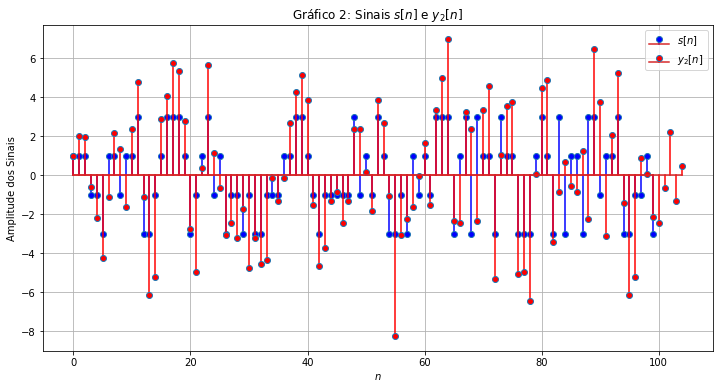

In [14]:
#Gráfico 2
plt.figure(figsize = (12,6))

markerline1, stemlines1, _ = plt.stem(s, label='$s[n]$')
plt.setp(markerline1, 'markerfacecolor', 'b')
plt.setp(stemlines1, 'color', 'b')

markerline2, stemlines2, _ = plt.stem(y2, label='$y_2[n]$')
plt.setp(markerline2, 'markerfacecolor', 'r')
plt.setp(stemlines2, 'color', 'r')

plt.legend()
plt.xlabel('$n$')
plt.ylabel('Amplitude dos Sinais')
plt.title('Gráfico 2: Sinais $s[n]$ e $y_2[n]$')
plt.grid()
plt.show()

### Discussão letra **(g)**

A partir dos gráficos plotados, observamos que o Gráfico 1 possui a saída mais próxima ao sinal original $s[n]$, reafirmando o que haviamos concluido anteriormente na letra **(e)**